# DATA SCIENCE PROJECT: Analysis of CRIME AGAINST WOMEN IN INDIA (2022)

Analysis of Crimes Against Women in India: A 2022 Overview
Focus: A comprehensive analysis of the crime landscape in India in 2022, identifying the most prevalent types of crimes, hotspots, and emerging trends.

Includes: Descriptive statistics, data visualization, crime category breakdown.

Importing libraries to be used 

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SOURCE OF DATASET

### Source: National Crime Records Bureau (NCRB), Ministry of Home Affairs, Government of India. Crime in India 2022 Report. https://ncrb.gov.in (Accessed: April 2025).

In [ ]:

# Reading DataSet
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
print("Data imported succesfully")

Top Rows of Dataset

In [ ]:
data.head()

Information about Dataset used:

In [ ]:
data.info()

Statistics of Data

In [ ]:
data.describe()

CHECKING MISSING/NULL VALUES

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

## Objective 1: Identifying High Risk States for Women
### The first objective of our analysis is to identify the high-risk states in India based on the incidence of crimes against women in 2022. This analysis will allow us to determine which regions have higher rates of violence or crimes affecting women and could provide useful insights for policy interventions, resource allocation, and awareness campaigns.

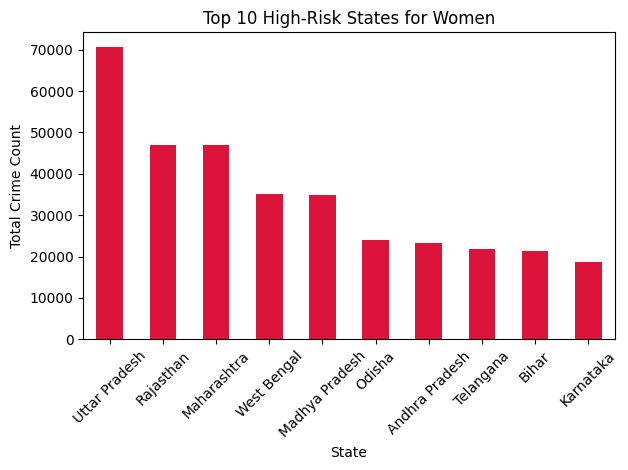

In [26]:
#using column indexes instead of names./ we can also use iloc function here.
cols = data.columns[[3,4,5,6,7,8,9,16,19,22,28,29,30,31,32,33,34,35,36,37,38,39,41,44,45]]


statewise_crime = data.groupby("State")[cols].sum()

#new column of total crime(sum of crime per state)
statewise_crime["Total_Crimes"] = statewise_crime.sum(axis=1)

top_risk_states = statewise_crime.sort_values("Total_Crimes", ascending=False)

# Plot
top_risk_states["Total_Crimes"].head(10).plot(kind='bar', color='crimson')
plt.title("Top 10 High-Risk States for Women")
plt.ylabel("Total Crime Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Objective 2: Identify High-Risk States for Women
# Sum total crimes per state across all columns except identifiers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
crime_columns = data.drop(columns=["S. No", "State", "District"]).columns
statewise_crime = data.groupby("State")[crime_columns].sum()
statewise_crime["Total Crimes"] = statewise_crime.sum(axis=1)
top_states = statewise_crime["Total Crimes"].sort_values(ascending=False).head(10)

# Plotting top 10 high-risk states
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")
plt.title("Top 10 High-Risk States for Women (Total Reported Crimes)")
plt.xlabel("Total Reported Crimes")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [ ]:
# Objective 2: Identify High-Risk States for Women
# Sum total crimes per state across all columns except identifiers
crime_columns = data.drop(columns=["S. No", "State", "District"]).columns
statewise_crime = data.groupby("State")[crime_columns].sum()
statewise_crime["Total Crimes"] = statewise_crime.sum(axis=1)
top_states = statewise_crime["Total Crimes"].sort_values(ascending=False).head(10)

# Plotting top 10 high-risk states
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")
plt.title("Top 10 High-Risk States for Women (Total Reported Crimes)")
plt.xlabel("Total Reported Crimes")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [ ]:
# Objective 3: Correlation Between Female Suicides and Cruelty by In-laws
suicide_col = "Suicide of Women"
cruelty_col = "Cruelty by Inlaws"

# Compute correlation
correlation_value = data[[suicide_col, cruelty_col]].corr().iloc[0, 1]

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=cruelty_col, y=suicide_col, alpha=0.6)
sns.regplot(data=data, x=cruelty_col, y=suicide_col, scatter=False, color="red", label=f"Corr: {correlation_value:.2f}")
plt.title("Correlation Between Female Suicides and Cruelty by In-laws")
plt.xlabel("Cruelty by In-laws")
plt.ylabel("Suicide of Women")
plt.legend()
plt.show()

correlation_value


In [ ]:
df_relevant = data[['Suicide of Women', 'Cruelty by Inlaws']]

# Drop any rows with missing data in these columns
df_relevant = df_relevant.dropna()

# Calculate the Pearson correlation coefficient
correlation = df_relevant.corr(method='pearson')



# Set the plot size and style
plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')

# Draw the heatmap
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Female Suicides vs Cruelty by In-laws")
plt.tight_layout()
plt.show()

In [ ]:
crime_data = data.iloc[:, 3:]

# Sum all values per crime category
crime_totals = crime_data.sum().sort_values(ascending=False)

# Display top 10 most prevalent crimes
top_10_crimes = crime_totals.head(10)
print("Top 10 Most Prevalent Crimes Against Women:\n")
print(top_10_crimes)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='magma')
plt.title('Top 10 Most Prevalent Crimes Against Women')
plt.xlabel('Total Cases')
plt.ylabel('Crime Category')
plt.show()

<html>

In [ ]:
print("\nColumns:", data.columns.tolist())

In [ ]:
# Columns related to crimes against different age groups
adult_crimes = ['Rape ', 'Rape of Women (above 18)', 'Sexual Harassment']
minor_crimes = ['Child Rape', 'Sexual Assault of Children', 'Use of Child for Pornography']


# Sum total crimes in each category
adult_total = data[adult_crimes].sum().sum()
minor_total = data[minor_crimes].sum().sum()

# Prepare data for plotting
crime_comparison = pd.Series({'Women (18+)': adult_total, 'Girls (<18)': minor_total})

# Plotting
plt.figure(figsize=(6, 5))
sns.barplot(x=crime_comparison.index, y=crime_comparison.values)
plt.title('Comparison of Crimes Against Women vs Girls')
plt.ylabel('Total Cases')
plt.xlabel('Age Group')

plt.show()


In [ ]:


# Get all crime columns (assuming they start from the 4th column)
crime_columns = data.columns[3:]

# Filter only numeric crime data
crime_data = data[crime_columns].select_dtypes(include='number')

# Sum total crimes per district
data["Total_Crimes"] = crime_data.sum(axis=1)

# Sort districts by lowest total crimes
safest_districts = data.sort_values(by="Total_Crimes").reset_index(drop=True)

# Show top 10 safest districts
top_10_safest = safest_districts[["State", "District", "Total_Crimes"]].head(5)
print("🛡️ Top 10 Safest Districts (Least Crimes Reported Against Women):\n")
print(top_10_safest)

plt.figure(figsize=(10, 6))
plt.bar(top_10_safest["District"], top_10_safest["Total_Crimes"], color='green')
plt.xlabel("Total Crimes")
plt.title("Top 10 Safest Districts for Women (Least Crimes)")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

In [ ]:
crime_data = data.iloc[:, 3:]

# Get top 15 crimes based on total counts
top_15_crimes = crime_data.sum().sort_values(ascending=False).head(10).index.tolist()

# Create correlation matrix for these top 15
filtered_corr = crime_data[top_15_crimes].corr()

# Get top correlated crime pairs (excluding self-correlation)
corr_unstacked = filtered_corr.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()

# Show top 10 correlated pairs
top_10_pairs = corr_sorted.head(10)
print("🔗 Top 10 Most Correlated Crime Pairs Among Top 15 Categories:\n")
print(top_10_pairs)

# Optional: Small heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Among Top 15 Crimes Against Women")
plt.tight_layout()
plt.show()


In [ ]:

exclude_cols = ['SNo', 'Year', 'State/UT', 'District']
crime_cols = [col for col in data.columns if col not in exclude_cols and data[col].dtype in ['int64', 'float64']]

# Group by State and sum all crimes
state_crime_totals = data.groupby('State')[crime_cols].sum()
state_crime_totals['Total'] = state_crime_totals.sum(axis=1)

# Calculate national total
national_total = state_crime_totals['Total'].sum()

# Add percentage contribution
state_crime_totals['Contribution (%)'] = (state_crime_totals['Total'] / national_total) * 100

# Sort by contribution
state_crime_sorted = state_crime_totals.sort_values(by='Contribution (%)', ascending=False)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Contribution (%)', y=state_crime_sorted.index, data=state_crime_sorted, palette='viridis')
plt.title('State-wise Contribution to National Crimes Against Women', fontsize=16)
plt.xlabel('Contribution to National Total (%)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

In [ ]:
#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading DataSet
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
print("Data imported succesfully")
exclude_cols = ['SNo', 'Year', 'State/UT', 'District']
crime_cols = [col for col in data.columns if col not in exclude_cols and data[col].dtype in ['int64', 'float64']]

# Group by State/UT and calculate total crimes
state_crimes = data.groupby('State')[crime_cols].sum()
state_crimes['Total Crimes'] = state_crimes.sum(axis=1)

# Sort and get top 10 states
top10_states = state_crimes['Total Crimes'].sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(top10_states, labels=top10_states.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9})
plt.title('Top 10 States Contributing to National Crimes Against Women', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Sample female population data (replace with actual values if available)
female_population = {
    'Uttar Pradesh': 104000000,
    'Rajasthan': 38000000,
    'Maharashtra': 61000000,
    'West Bengal': 46000000,
    'Madhya Pradesh': 44000000,
    'Odisha': 21000000,
    'Telangana': 18000000,
    'Tamil Nadu': 36000000,
    'Karnataka': 33000000,
    'Delhi': 8800000,
    # Add more states...
}
# Group crimes by state and calculate total
state_crimes = data.groupby('State')[crime_cols].sum()
state_crimes['Total Crimes'] = state_crimes.sum(axis=1)

# Convert population dictionary to DataFrame
pop_df = pd.DataFrame.from_dict(female_population, orient='index', columns=['Female Population'])
pop_df.index.name = 'State'

# Merge population with crime data
merged_data = state_crimes.merge(pop_df, left_index=True, right_index=True)

# Calculate crime rate per 100,000 women
merged_data['Crime Rate (per 100k women)'] = (merged_data['Total Crimes'] / merged_data['Female Population']) * 100000

# Get 10 safest states based on crime rate
safest_states_by_rate = merged_data.sort_values(by='Crime Rate (per 100k women)', ascending=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=safest_states_by_rate.index, x=safest_states_by_rate['Crime Rate (per 100k women)'], palette='Greens_r')
plt.xlabel('Crime Rate per 100,000 Women')
plt.ylabel('State')
plt.title('Top 10 Safest States for Women (Based on Crime Rate)', fontsize=14)
plt.tight_layout()
plt.show()
